In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test = pd.read_csv('stack_stats_2020_test.csv')
train = pd.read_csv('stack_stats_2020_train.csv')

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sophea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import timeit
start = timeit.default_timer()
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  2.844299999971156e-05


In [4]:
from bs4 import BeautifulSoup

In [5]:
# (1ai) HTML text to plain text
start = timeit.default_timer()
text_train = train['Body']
train['Body'] = text_train.apply(lambda text_train: BeautifulSoup(text_train, 'html.parser').get_text())
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  11.595823091


In [6]:
start = timeit.default_timer()
text_test = test['Body']
test['Body'] = text_test.apply(lambda text_test: BeautifulSoup(text_test, 'html.parser').get_text())
stop = timeit.default_timer()
print('Time: ', stop - start)
test['Body']


Time:  4.9449309029999995


0       So my problem is this:\nI have a toleranced pa...
1       Let x and y be complex Gaussian random vectors...
2       I want to compare the model fitting properties...
3       I do not understand the assumption 1,2,⋯ are i...
4       Target encoding (aka mean or categorical encod...
                              ...                        
8244    I have collected bond yield data from 01/01/20...
8245    In a population of 10000 people, there is a 2%...
8246    \n\nI ran a multiple logistic regression model...
8247    I conduct a staggered difference-in-difference...
8248    X has a discrete distribution with support $x1...
Name: Body, Length: 8249, dtype: object

In [7]:
# (1aii) Remove linebreak character
train['Body'] = train['Body'].str.replace('\n', ' ')
test['Body'] = test['Body'].str.replace('\n', ' ')
train['Body'][0]

'I often hear that in a longitudinal multi-level analysis, time points (as a fixed factor) are "nested" within students (e.g., just search the word $nest$ in this paper). However, this great answer very clearly indicates that time points can\'t be "nested" within a cluster (e.g., a student). Because, every cluster is planned to taste every time point in theory. So time points and students are crossed. Question: Is the use of the phrase time points are "nested" within students just sloppy language? If it is, how could we correctly describe the relation of the time points to students? '

In [8]:
train['Body']

0        I often hear that in a longitudinal multi-leve...
1        I have a normally distributed dataset and an a...
2        I have created a random forest to classify a d...
3        I have some issues with my linear difference-i...
4        I have created a mixed model to model the numb...
                               ...                        
19242    I've read the post how Deriving the formula fo...
19243    I am doing a study on three groups of students...
19244    Is there a neural network that can take data f...
19245    I am testing the following models. Volumes wer...
19246    Mahalanobis distance provides a value that mig...
Name: Body, Length: 19247, dtype: object

In [9]:
# (1aiii) Transformations
from string import punctuation

def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct

train['Tags'] = train['Tags'].str.replace('\>', '')
train['Tags'] = train['Tags'].str.replace('\<', ' ')
train['Tags'] = train['Tags'].apply(remove_punctuation)
train['Body'] = train['Body'].apply(remove_punctuation)
train['Title'] = train['Title'].apply(remove_punctuation)



test['Tags'] = test['Tags'].str.replace('\>', '')
test['Tags'] = test['Tags'].str.replace('\<', ' ')
test['Tags'] = test['Tags'].apply(remove_punctuation)
test['Body'] = test['Body'].apply(remove_punctuation)
test['Title'] = test['Title'].apply(remove_punctuation)


In [92]:
train 

,Id,Score,Body,Title,Tags
0,475417,5,"[often, hear, longitudin, multilevel, analysi,...","[time, point, nest, student, cross, longitudin...","[r, mixedmodel, lmenlm, repeatedmeasur, multil..."
1,454969,1,"[normal, distribut, dataset, associ, systemat,...","[find, confid, level, given, confid, interv]","[r, probabl, normaldistribut, confidenceinterv]"
2,475651,0,"[creat, random, forest, classifi, dataset, var...","[random, forest, classifi, bound, specif, type...","[randomforest, featureselect, error]"
3,474736,0,"[issu, linear, differenceindiffer, analys, out...","[back, transform, ln, log, interpret, result]","[regress, logist, multipleregress, logarithm, ..."
4,471570,1,"[creat, mix, model, model, number, job, differ...","[interpret, dotplot, mix, model]","[r, regress, multilevelanalysi, model]"
...,...,...,...,...,...
19242,458986,0,"[ive, read, post, deriv, formula, onpolici, di...","[doubt, formula, “, onpolici, distribut, episo...","[machinelearn, distribut, reinforcementlearn]"
19243,493130,0,"[studi, three, group, student, differ, hear, l...","[statist, model, use, three, group, ten, parti...","[regress, anova]"
19244,467849,0,"[neural, network, take, data, one, distribut, ...","[neural, network, domainstyl, transform]","[neuralnetwork, datatransform, domainadapt]"
19245,443560,2,"[test, follow, model, volum, purpos, log, tran...","[report, pvalu, standard, unstandard, beta, di...","[statisticalsignific, multipleregress, pvalu, ..."


### 1a.iv Cleaning, Document Term Matrices

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/sophea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#lower case, remove digits

def remove_digit(document): 
    
    no_digit = ''.join([character for character in document if not character.isdigit()])
              
    return no_digit

train['Body'] = train['Body'].apply(str.lower).apply(remove_digit)
train['Tags'] = train['Tags'].apply(str.lower).apply(remove_digit)
train['Title'] = train['Title'].apply(str.lower).apply(remove_digit)

test['Body'] = test['Body'].apply(str.lower).apply(remove_digit)
test['Tags'] = test['Tags'].apply(str.lower).apply(remove_digit)
test['Title'] = test['Title'].apply(str.lower).apply(remove_digit)

In [13]:
#Tokenization

from nltk.tokenize import word_tokenize

text_tokenized = train['Tags'].apply(word_tokenize)
text_tokenized.head()

#Remove Stopwords
from nltk.corpus import stopwords

stop_words = nltk.corpus.stopwords.words('english')

stop_words.append(['stack', 'overflow', 'exchange'])

def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
    return words

text_no_stop = text_tokenized.apply(remove_stopwords)
text_no_stop

#Stemming
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document]
    
    return stemmed_document
train['Body'] = train['Body'].apply(word_tokenize).apply(remove_stopwords).apply(stemmer)
train['Tags'] = train['Tags'].apply(word_tokenize).apply(remove_stopwords).apply(stemmer)
train['Title'] = train['Title'].apply(word_tokenize).apply(remove_stopwords).apply(stemmer)

test['Body'] = test['Body'].apply(word_tokenize).apply(remove_stopwords).apply(stemmer)
test['Tags'] = test['Tags'].apply(word_tokenize).apply(remove_stopwords).apply(stemmer)
test['Title'] = test['Title'].apply(word_tokenize).apply(remove_stopwords).apply(stemmer)

In [14]:
train['Body'][2]

['creat',
 'random',
 'forest',
 'classifi',
 'dataset',
 'variabl',
 'sampl',
 'featur',
 'select',
 'boruta',
 'packag',
 'variabl',
 'select',
 'problem',
 'matter',
 'chang',
 'partit',
 'data',
 'matter',
 'mani',
 'variabl',
 'use',
 'build',
 'model',
 'confus',
 'matrix',
 'alway',
 'end',
 'good',
 'respons',
 'classifi',
 'poor',
 'train',
 'model',
 'variabl',
 'get',
 'setse',
 'indsampl',
 'nrowdata',
 'replacet',
 'probc',
 'traindataind',
 'testdataind',
 'setse',
 'rfrandomforestrespons',
 'datatrain',
 'predictpredictrf',
 'test',
 'confusionmatrixpredict',
 'testrespons',
 'confus',
 'matrix',
 'statist',
 'refer',
 'predict',
 'good',
 'poor',
 'good',
 'poor',
 'accuraci',
 'ci',
 'inform',
 'rate',
 'pvalu',
 'acc',
 'nir',
 'kappa',
 'mcnemar',
 'test',
 'pvalu',
 'sensit',
 'specif',
 'po',
 'pred',
 'valu',
 'nan',
 'neg',
 'pred',
 'valu',
 'preval',
 'detect',
 'rate',
 'detect',
 'preval',
 'balanc',
 'accuraci',
 'posit',
 'class',
 'good',
 'train',
 'three

#### Document-Term Matrix

In [15]:
concat_body = pd.concat([train['Body'], test['Body']]) #, keys=['train', 'test'])
concat_tags = pd.concat([train['Tags'], test['Tags']]) #, keys=['train', 'test'])
concat_title = pd.concat([train['Title'], test['Title']]) #, keys=['train', 'test'])

concat_body#['train']

0       [often, hear, longitudin, multilevel, analysi,...
1       [normal, distribut, dataset, associ, systemat,...
2       [creat, random, forest, classifi, dataset, var...
3       [issu, linear, differenceindiffer, analys, out...
4       [creat, mix, model, model, number, job, differ...
                              ...                        
8244    [collect, bond, yield, data, sever, eurozon, c...
8245    [popul, peopl, chanc, someon, cancer, fals, po...
8246    [ran, multipl, logist, regress, model, second,...
8247    [conduct, stagger, differenceindiffer, analysi...
8248    [x, discret, distribut, support, x, x, right, ...
Name: Body, Length: 27496, dtype: object

In [16]:
# Detokenization
from nltk.tokenize.treebank import TreebankWordDetokenizer

body = concat_body.apply(TreebankWordDetokenizer().detokenize)
tags = concat_tags.apply(TreebankWordDetokenizer().detokenize)
title = concat_title.apply(TreebankWordDetokenizer().detokenize)

# train['Body'] = train['Body'].apply(TreebankWordDetokenizer().detokenize)
# train['Tags'] = train['Tags'].apply(TreebankWordDetokenizer().detokenize)
# train['Title'] = train['Title'].apply(TreebankWordDetokenizer().detokenize)

# test['Body'] = test['Body'].apply(TreebankWordDetokenizer().detokenize)
# train['Tags'] = test['Tags'].apply(TreebankWordDetokenizer().detokenize)
# test['Title'] = test['Title'].apply(TreebankWordDetokenizer().detokenize)

In [141]:
dtm_body

,abl_body,accord_body,account_body,accuraci_body,across_body,actual_body,ad_body,add_body,addit_body,adjust_body,...,work_body,would_body,write_body,wrong_body,xi_body,ye_body,year_body,yet_body,yi_body,zero_body
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
8245,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8247,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [60]:
# Document-Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

# I chose these values of min_df for the body so that my DataFrame of body has ~500 features. 
# For the title and tags, since most of their words are useful, I used a smaller min_df. 
countvec = CountVectorizer(min_df=0.02)
countvec2 = CountVectorizer(min_df=0.01)
countvec3 = CountVectorizer(min_df=0.01)

sparse_dtm_body = countvec.fit_transform(body)
sparse_dtm_tags = countvec2.fit_transform(tags)
sparse_dtm_title = countvec3.fit_transform(title)

In [61]:
sparse_dtm_body
dtm_body = pd.DataFrame(sparse_dtm_body.toarray(), columns=countvec.get_feature_names(), index=body.index)

In [63]:
dtm_body = pd.DataFrame(sparse_dtm_body.toarray(), columns=countvec.get_feature_names(), index=body.index)
dtm_tags = pd.DataFrame(sparse_dtm_tags.toarray(), columns=countvec2.get_feature_names(), index=tags.index)
dtm_title = pd.DataFrame(sparse_dtm_title.toarray(), columns=countvec3.get_feature_names(), index=title.index)

new_col = []
for col in dtm_body.columns:
    new_col.append(col + '_body')
dtm_body.columns = new_col

new_col = []
for col in dtm_tags.columns:
    new_col.append(col + '_tags')
dtm_tags.columns = new_col

new_col = []
for col in dtm_title.columns:
    new_col.append(col + '_title')
dtm_title.columns = new_col

dtm_body_train, dtm_body_test = dtm_body.iloc[:19247,:], dtm_body.iloc[19247:,:]
dtm_tags_train, dtm_tags_test = dtm_tags.iloc[:19247,:], dtm_tags.iloc[19247:,:]
dtm_title_train, dtm_title_test = dtm_title.iloc[:19247,:], dtm_title.iloc[19247:,:]

In [66]:
X_train = dtm_body_train.merge(dtm_tags_train, left_index = True, right_index = True).merge(dtm_title_train, left_index = True, right_index = True)
X_test = dtm_body_test.merge(dtm_tags_test, left_index = True, right_index = True).merge(dtm_title_test, left_index = True, right_index = True)

In [67]:
y_train = pd.Series([1 if score >= 1 else 0 for score in train['Score']])
y_test = pd.Series([1 if score >= 1 else 0 for score in test['Score']])

# Part B
## 0. Baseline

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(y_train.value_counts())
print(y_test.value_counts())
# Baseline accuracy on test set
print('ACC', 4173/(4173 + 4076)) #predict not useful = 0
cm_baseline = confusion_matrix(y_test, [0]*y_test.shape[0])
print ("Confusion Matrix: \n", cm_baseline)
print ("\nAccuracy:", accuracy_score(y_test, [0]*y_test.shape[0]))

0    9737
1    9510
dtype: int64
0    4173
1    4076
dtype: int64
ACC 0.5058795005455207
Confusion Matrix: 
 [[4173    0]
 [4076    0]]

Accuracy: 0.5058795005455207


## 1. Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88, max_iter = 500)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=88)

In [70]:
y_prob = logreg.predict_proba(X_test)
y_pred_logit = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)

cm_logit = confusion_matrix(y_test, y_pred_logit)
print ("Confusion Matrix: \n", cm_logit)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_logit))

Confusion Matrix: 
 [[2584 1589]
 [1972 2104]]

Accuracy: 0.5683113104618742


## 2. Decision Tree Classifier w CV

In [326]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time

tic = time.time()

# This range of values already took me 22 minutes to compute, so I did not want to test even more data points.
grid_values = {'ccp_alpha': np.linspace(0, 0.02, 50)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(X_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')


time: 1292.75 s


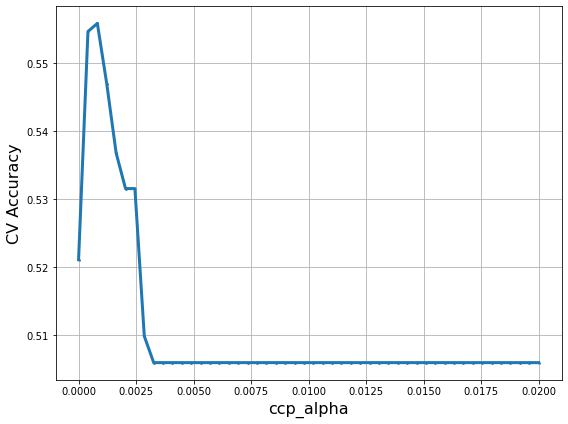

Best ccp_alpha {'ccp_alpha': 0.0008163265306122449}


In [327]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [328]:
y_pred_dtc = dtc_cv.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print ("Confusion Matrix: \n", cm_dtc)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_dtc))

Confusion Matrix: 
 [[2821 1352]
 [2406 1670]]

Accuracy: 0.5444296278336768


## 3. Gradient Boosting Classifier

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

# grid_values = {'n_estimators': np.linspace(100, 5000, 50, dtype='int32'),  # np.logspace(6, 12, num=7, base=2, dtype='int32'),
#                'learning_rate': [0.01],
#                'max_leaf_nodes': np.linspace(2, 10, 8, dtype='int32'),
#                'max_depth': [100],
#                'min_samples_leaf': [10],
#                'random_state': [88]} 

tic = time.time()

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# gbc_cv = GridSearchCV(gbc, param_grid=grid_values, cv=5)
# gbc_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

time: 24.37 s


In [75]:
# n_estimators = gbc_cv.cv_results_['param_n_estimators'].data
# cv_acc_scores = gbc_cv.cv_results_['mean_test_score']

# plt.figure(figsize=(12, 8))
# plt.xlabel('n estimators', fontsize=16)
# plt.ylabel('CV Accuracy', fontsize=16)
# plt.grid(True, which='both')

# N = len(grid_values['max_leaf_nodes'])
# M = len(grid_values['n_estimators'])
# for i in range(N):
#     plt.scatter(n_estimators[(M*i):(M*i)+M], cv_acc_scores[(M*i):(M*i)+M], s=30)
#     plt.plot(n_estimators[(M*i):(M*i)+M], cv_acc_scores[(M*i):(M*i)+M], linewidth=2,
#              label='max leaf nodes = '+str(grid_values['max_leaf_nodes'][i]))
# plt.legend(loc='lower right')
# plt.show()

In [76]:
y_pred_gbc = gbc.predict(X_test)
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
print ("Confusion Matrix: \n", cm_gbc)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_gbc))

Confusion Matrix: 
 [[2932 1241]
 [2244 1832]]

Accuracy: 0.5775245484301127


## 4. LDA
Normally distributed features? No

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [78]:
y_pred_lda = lda.predict(X_test)
cm_lda = confusion_matrix(y_test, y_pred_lda)
print ("Confusion Matrix: \n", cm_lda)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_lda))

Confusion Matrix: 
 [[2605 1568]
 [2003 2073]]

Accuracy: 0.5670990423081586


## 5. Random Forest Classifier

In [313]:
from sklearn.ensemble import RandomForestClassifier
tic = time.time()
rf = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 18.63 s


In [80]:
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print ("Confusion Matrix: \n", cm_rf)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix: 
 [[2672 1501]
 [1929 2147]]

Accuracy: 0.5841920232755485


In [81]:
def classification_metrics(confusion_matrix):
    accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / np.sum(confusion_matrix[:,:])
    tpr = confusion_matrix[1,1] / (confusion_matrix[1,0] + confusion_matrix[1,1])
    fpr = confusion_matrix[0,1] / (confusion_matrix[0,0] + confusion_matrix[0,1])
    return [accuracy, tpr, fpr]

In [330]:
comparison_data = [classification_metrics(models) for models in [cm_baseline, cm_logit, cm_dtc, cm_gbc, cm_lda, cm_rf]] 
comparison_table = pd.DataFrame(data=comparison_data, index=['Baseline Model', 'Logistic Regression', 'Classification Tree Model', 'Gradient Boosted Classifier', 'LDA', 'Random Forest'])
comparison_table = comparison_table.rename(columns={0:'Accuracy', 1:'TPR', 2:'FPR'})
comparison_table

,Accuracy,TPR,FPR
Baseline Model,0.505880,0.000000,0.000000
Logistic Regression,0.568311,0.516192,0.380781
Classification Tree Model,0.544430,0.409715,0.323988
Gradient Boosted Classifier,0.577525,0.449460,0.297388
LDA,0.567099,0.508587,0.375749
Random Forest,0.584192,0.526742,0.359693


## Bootstrapping Random Forest

In [ ]:
# pip install bootstrapped

In [83]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [324]:
def accuracy(predictions, y_test,y_train):
    return accuracy_score(y_test,predictions)

def tpr(predictions, y_test, y_train):
    cm = confusion_matrix(y_test, predictions)
    tpr = cm[1,1] / (cm[1,0] + cm[1,1])
    return tpr

def fpr(predictions, y_test,y_train):
    cm = confusion_matrix(y_test, predictions)
    fpr = cm[0,1] / (cm[0,0] + cm[0,1])
    return fpr

In [85]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
#         if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [332]:
tic = time.time()
# 100 samples took me ~3 minutes to run
# 500 samples took me ~15 minutes to run
# 1000 samples took me ~30 minutes to run

bs_output = bootstrap_validation(X_test,y_test,y_train,rf,
                                 metrics_list=[accuracy, tpr, fpr],
                                 sample = 500)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

(500, 3)
time: 1035.06 s


In [333]:
bs_output

,0,1,2
0,0.586374,0.520723,0.347158
1,0.592920,0.537770,0.352130
2,0.589284,0.523310,0.345617
3,0.587586,0.532544,0.359170
4,0.588314,0.527246,0.352096
...,...,...,...
495,0.586859,0.522527,0.350060
496,0.587708,0.522623,0.346939
497,0.587950,0.527615,0.352658
498,0.587465,0.527806,0.356589


(array([ 1.,  0.,  1.,  4.,  6., 16., 30., 38., 52., 57., 62., 59., 45.,
        47., 37., 23., 14.,  6.,  1.,  1.]),
 array([-0.02604149, -0.0236178 , -0.0211941 , -0.01877041, -0.01634672,
        -0.01392303, -0.01149934, -0.00907565, -0.00665196, -0.00422827,
        -0.00180457,  0.00061912,  0.00304281,  0.0054665 ,  0.00789019,
         0.01031388,  0.01273757,  0.01516126,  0.01758496,  0.02000865,
         0.02243234]),
 <BarContainer object of 20 artists>)

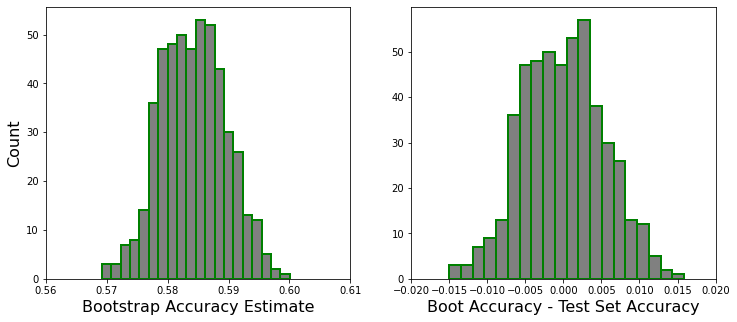

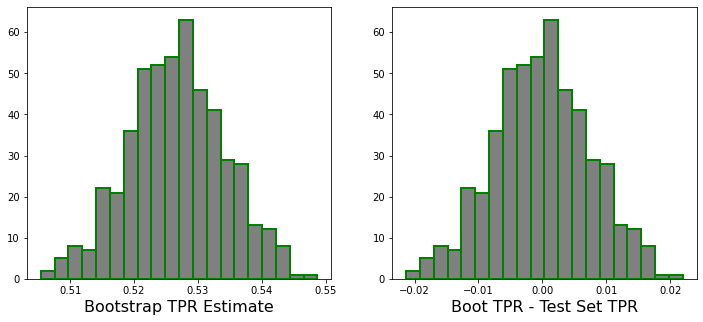

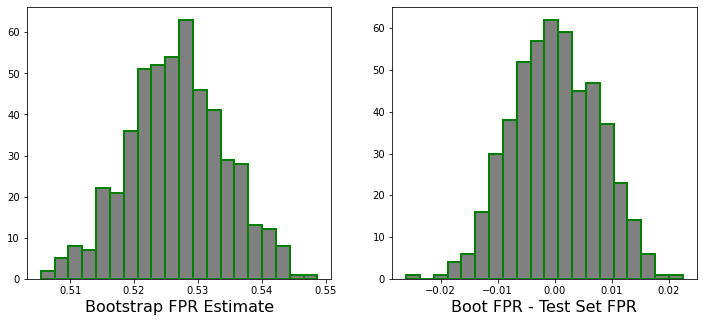

In [334]:
test_accuracy = accuracy(y_pred_rf,y_test,y_train)
test_tpr = tpr(y_pred_rf,y_test,y_train)
test_fpr = fpr(y_pred_rf,y_test,y_train)

fig, axs = plt.subplots(ncols=2, nrows = 1, figsize=(12,5))
axs[0].set_ylabel('Count', fontsize=16)
axs[0].set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
axs[0].hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.56,0.61])
axs[1].set_xlabel('Boot Accuracy - Test Set Accuracy', fontsize=16) # Bias
axs[1].hist(bs_output.iloc[:,0]-test_accuracy, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.02,0.02])

fig2, axs2 = plt.subplots(ncols=2, nrows = 1, figsize=(12,5))

axs2[0].set_xlabel('Bootstrap TPR Estimate', fontsize=16)
axs2[0].hist(bs_output.iloc[:,1], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs2[1].set_xlabel('Boot TPR - Test Set TPR', fontsize=16) # Bias
axs2[1].hist(bs_output.iloc[:,1]-test_tpr, bins=20,edgecolor='green', linewidth=2,color = "grey")

fig3, axs3 = plt.subplots(ncols=2, nrows = 1, figsize=(12,5))

axs3[0].set_xlabel('Bootstrap FPR Estimate', fontsize=16)
axs3[0].hist(bs_output.iloc[:,1], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs3[1].set_xlabel('Boot FPR - Test Set FPR', fontsize=16) # Bias
axs3[1].hist(bs_output.iloc[:,2]-test_fpr, bins=20,edgecolor='green', linewidth=2,color = "grey")



In [335]:
# The 95% confidence interval
CI_accuracy= np.quantile(bs_output.iloc[:,0],np.array([0.025,0.975]))
print("The 95-percent confidence interval of accuracy is %s" % CI_accuracy)

CI_TPR= np.quantile(bs_output.iloc[:,1],np.array([0.025,0.975]))
print("The 95-percent confidence interval of TPR is %s" % CI_TPR)

CI_FPR= np.quantile(bs_output.iloc[:,2],np.array([0.025,0.975]))
print("The 95-percent confidence interval of FPR is %s" % CI_FPR)

The 95-percent confidence interval of accuracy is [0.57363317 0.59461753]
The 95-percent confidence interval of TPR is [0.51122181 0.54155314]
The 95-percent confidence interval of FPR is [0.34592484 0.37317585]


b) Report on the details of your training procedures and final comparisons on the test set.  Useyour best judgment to choose a final model and explain your choice. Use the bootstrap to asses the performance of your single chosen final model in a way that properly reports on the variability of the relevant performance metrics (accuracy, TPR, and FPR). 
#### Summary: Details of  training procedures and final comparisons on the test set.  
I chose to use the random forest  model because it has the highest accuracy and the a highest TPR while having an intermediate FPR level. Using bootstraping with 500 bootstrapped samples shows that the histograms for all three metrics (accuracy, TPR, FPR) are centered at zero with a normal distribution. This is good, because on average, the final model won't predict outliers, and the variability of the performance metrics is small.

The 95-percent confidence interval of accuracy is [0.57590617, 0.5948024].
The 95-percent confidence interval of TPR is [0.51300338, 0.54137507].
The 95-percent confidence interval of FPR is [0.34533129, 0.37298975].

The confidence intervals are relatively narrow, which shows that the performance metrics have low variability. Note that the accuracy of the baseline model is not within the RF CI of accuracy, which suggests that the RF does significantly improve accuracy. 

# Part C
Suppose that Stack Exchange would like to keep these same 15 most recently submitted questions on thispage,  but  they  would  like  to  rearrange  the  order  of  the  questions  so  as  to  show  the  mostuseful questions at the top of the page.  Suppose further that Stack Exchange believes that most users are extremely impatient and will only pay attention to the single question at the very top of the page, and therefore they would like to maximize the probability that the top question is useful.

## i) 
To best accomplishthe  goal  of  maximizing  the  probability  that  the  top  question  is  useful, I would select a model with the highest TPR. The true positive rate is the rate at which a question that is predicted to be useful is actually useful. The higher this is, the greater the probability that the question that is put at the top and predicted to be useful -- is actually useful. 

## ii)
My model with the highest TPR is the random forest model, so I will chose this one.

How much does the model you selected improve upon StackExchange’s current approach of showing the most recent posts first (described above)?In particular, use the results of your model on the test set to give a precise numericalestimate of the increase in the probability that the top question is useful.  If you like, youmay use a back-of-the-envelope “on average” style of analysis as part of your reasoningto answer this question.

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Here, I retrain the model to favor predicting not useful (0)

# tic = time.time()
# rf_new = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88, class_weight = {0:1.2, 1:1})
# rf_new.fit(X_train, y_train)

# toc = time.time()
# print('time:', round(toc-tic, 2),'s')

# y_pred_rf_new = rf_new.predict(X_test)
# cm_rf_new = confusion_matrix(y_test, y_pred_rf_new)
# print ("Confusion Matrix: \n", cm_rf_new)
# print ("\nAccuracy:", accuracy_score(y_test, y_pred_rf_new))

In [320]:
# classification_metrics(cm_rf_new)
# from sklearn.metrics import plot_roc_curve
# plot_roc_curve(rf_new, y_test, y_pred_rf_new)

In [318]:
import random

all_posts = pd.merge(test.loc[:,'Id':'Score'], X_test, left_index = True, right_index = True)
all_posts_probs = rf_new.predict_proba(all_posts.iloc[:, 2:]) #first column is P(not useful), second column is P(useful)
all_posts[['Not Useful', 'Useful']] = all_posts_probs

successes_new_model, successes_old_model = [], []
start = timeit.default_timer()

# TAKES ~7 MINUTES TO RUN edit: not anymore! improved efficincy to 9 seconds :o
for _ in range(len(X_test)): #len(X_test)
    random.seed(1)
    shown_posts = all_posts.sample(15, replace = False).sort_values(by='Id')

    top_question_is_useful = [1 if shown_posts.iloc[0, 1] >= 1 else 0]
    successes_old_model.append(top_question_is_useful)

    # Rearrange the order of questions to show the most useful question at the top. 
    # This means put the question with the highest probability of being useful at the top.
    position_of_most_useful_question = np.argmax(shown_posts['Useful']) #probability of the most useful question being useful
    top_reordered_question_is_useful = [1 if shown_posts.iloc[position_of_most_useful_question, 1] >= 1 else 0]
    successes_new_model.append(top_reordered_question_is_useful)
    
stop = timeit.default_timer()
print('Time: ', stop - start)

print('New Model Average: ', np.mean(successes_new_model))
print('Old Model Average: ', np.mean(successes_old_model))

Time:  8.56705657099883
New Model Average:  0.6654139895744938
Old Model Average:  0.6289247181476543


#### c.ii) Using my random forest model (which yielded the greatest TPR), the estimate of the increase in the probability that the top question is useful increased from 0.628 to 0.665. This is a 0.037 increase in probability, which I believe would be useful to stack exchange.